In [1]:
import sys

#sys.path.insert(0, 'backend_functions')

#import selection_functions as sf

import importlib

import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb

import awkward
import matplotlib.pyplot as plt
import pandas as pd

import ROOT
from ROOT import TH1F, TH2F, TDirectory, TH1D

from matplotlib import gridspec


Welcome to JupyROOT 6.24/02


In [2]:
ending = "Jan19b_MECTune"

In [3]:
##Regular tune prior true and smearcept to be used


#Recall for comparison it will be the MEC tune for prior true

In [4]:
####Load in MECTune full event counts

nue_data_signal = pd.read_csv("nue_full_500_catsel_nopions_leptonMom_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", header=None)

nue_data_signal = nue_data_signal.values[:, 0]

print(nue_data_signal)
print("")

######

numu_data_signal = pd.read_csv("numu_full_500_catsel_nopions_leptonMom_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", header=None)

numu_data_signal = numu_data_signal.values[:, 0]

print(numu_data_signal)

[55.61470809 91.97514097 61.91655092 34.68615697 18.0755804   8.2933219
  5.0724485   7.88156029]

[ 608.58266421 1351.07711334  515.48099251  196.57628441   72.36974305
   35.71742172    8.59934254    2.7479548 ]


In [5]:
###Load in regular tune bkg event counts
#Include ext in bkg count here as the full event counts do

ending = "Jan19b" #need this ending as bkg is from regular tune



nue_bkg_inc_ext = pd.read_csv("nue_nopions_leptonMom_usingSelection_comb_cv_nue_bkg_incExt_"+ending+".csv", header=None)

nue_bkg_inc_ext = nue_bkg_inc_ext.values[:, 0]

print(nue_bkg_inc_ext)
print("")

#######################

numu_bkg_inc_ext = pd.read_csv("numu_nopions_leptonMom_usingSelection_comb_cv_numu_bkg_incExt_"+ending+".csv", header=None)

numu_bkg_inc_ext = numu_bkg_inc_ext.values[:, 0]

print(numu_bkg_inc_ext)
print("")

[28.18755859 21.37330874 13.29152786  7.22706492  5.09821093  2.51242116
  1.18831144  2.77856114]

[225.36152728 387.72503358 114.33563322  43.12465401  13.03469238
   6.71706711   1.74065891   1.99249231]



In [6]:
####So then can calculate the data signal input to the unfolding

nue_datasig_bkg_subtracted = nue_data_signal - nue_bkg_inc_ext
print(nue_datasig_bkg_subtracted)
print("")

numu_datasig_bkg_subtracted = numu_data_signal - numu_bkg_inc_ext
print(numu_datasig_bkg_subtracted)

[27.4271495  70.60183224 48.62502305 27.45909205 12.97736947  5.78090075
  3.88413705  5.10299916]

[3.83221137e+02 9.63352080e+02 4.01145359e+02 1.53451630e+02
 5.93350507e+01 2.90003546e+01 6.85868363e+00 7.55462491e-01]


In [7]:
nue_numu_tot = np.concatenate((nue_datasig_bkg_subtracted, numu_datasig_bkg_subtracted), axis=0)

print(nue_numu_tot)
print(len(nue_numu_tot))

[2.74271495e+01 7.06018322e+01 4.86250231e+01 2.74590920e+01
 1.29773695e+01 5.78090075e+00 3.88413705e+00 5.10299916e+00
 3.83221137e+02 9.63352080e+02 4.01145359e+02 1.53451630e+02
 5.93350507e+01 2.90003546e+01 6.85868363e+00 7.55462491e-01]
16


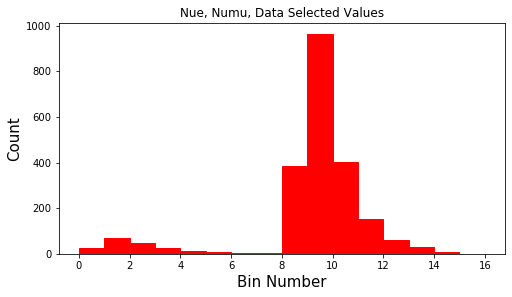

In [8]:
nue_numu_fig = plt.figure(figsize=(8, 7))
nue_numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1 = plt.subplot(nue_numu_gs[0])


bins = np.arange(0, 17, 1)
count = np.arange(0.0, 16.0, 1)


sel_ratio = nue_numu_ax1.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_tot)
nue_numu_ax1.set_ylabel('Count', fontsize=15)
nue_numu_ax1.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1.set_title("Nue, Numu, Data Selected Values")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 1])

nue_numu_fig.savefig("data_signal_MC_MECTune_input_leptonMom_comb_"+ending+".svg", bbox_inches='tight')

In [9]:
np.savetxt("data_signal_MC_MECTune_input_leptonMom_comb_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')

print(ending)

Jan19b


In [11]:
####Now need to get in the uncertainties

###First up, get the noTune statistical uncertinaty. This will be from sig + bkg in noTune

ending = "Jan19b_MECTune" 


nue_sig_unc = pd.read_csv("nue_total_noTune_err_squared_lepton_comb_"+ending+".csv", header=None)

nue_sig_unc = nue_sig_unc.values[:, 0]

print(nue_sig_unc)
print("")

########################

numu_sig_unc = pd.read_csv("numu_total_noTune_err_squared_lepton_comb_"+ending+".csv", header=None)

numu_sig_unc = numu_sig_unc.values[:, 0]

print(numu_sig_unc)
print("")

#######################The regular tune bkg stat uncertainties

ending = "Jan19b" #need this ending as bkg is from regular tune


nue_bkg_unc = pd.read_csv("nue_bkg_exp_err_squared_lepton_comb_"+ending+".csv", header=None)

nue_bkg_unc = nue_bkg_unc.values[:, 0]

print(nue_bkg_unc)
print("")

########################

numu_bkg_unc = pd.read_csv("numu_bkg_exp_err_squared_lepton_comb_"+ending+".csv", header=None)

numu_bkg_unc = numu_bkg_unc.values[:, 0]

print(numu_bkg_unc)
print("")

[10.61978176 13.21798574  6.21644834  3.84313103  1.77589998  0.43502141
  0.34104609  0.46220302]

[4.24450771e+02 1.10916869e+03 5.80817134e+02 2.81601179e+02
 6.36202944e+01 5.39980136e+01 2.19571320e+01 6.19718368e-01]

[8.90143948 4.56612078 1.37001185 0.69757724 0.5610559  0.20903121
 0.09090827 0.34363066]

[ 76.94303064 113.19153829  33.61995905  19.15311636   4.09977284
   1.42445293   0.37897599   0.47767569]



In [12]:
nue_stat_unc = nue_sig_unc + nue_bkg_unc
print(nue_stat_unc)
print("")

########################

numu_stat_unc = numu_sig_unc + numu_bkg_unc
print(numu_stat_unc)
print("")

#########################

nue_numu_tot_unc = np.concatenate((nue_stat_unc, numu_stat_unc), axis=0)

print(nue_numu_tot_unc)

[19.52122124 17.78410652  7.58646019  4.54070827  2.33695589  0.64405262
  0.43195435  0.80583368]

[5.01393802e+02 1.22236023e+03 6.14437093e+02 3.00754296e+02
 6.77200673e+01 5.54224665e+01 2.23361080e+01 1.09739406e+00]

[1.95212212e+01 1.77841065e+01 7.58646019e+00 4.54070827e+00
 2.33695589e+00 6.44052623e-01 4.31954354e-01 8.05833676e-01
 5.01393802e+02 1.22236023e+03 6.14437093e+02 3.00754296e+02
 6.77200673e+01 5.54224665e+01 2.23361080e+01 1.09739406e+00]


In [13]:
nue_numu_cov_stats   = np.zeros([(len(bins)-1), (len(bins)-1)])
print(nue_numu_cov_stats)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [14]:
nue_numu_cov_stats[np.diag_indices_from(nue_numu_cov_stats)]    = nue_numu_tot_unc

In [15]:
###Then sprinkle in the regular tune genie sys uncertainties

# Load in the blockwise genie cov matrix

blockwise_genie_err = pd.read_csv("blockwise_cov_genie_only_leptonMom_comb_"+ending+".csv", header=None)

blockwise_genie_err = blockwise_genie_err.values
print(blockwise_genie_err)

[[3.49712706e+01 6.48508705e+01 4.64440488e+01 2.73207068e+01
  1.20091132e+01 5.48148284e+00 3.94124812e+00 5.74156125e+00
  3.86610103e+02 8.57561414e+02 4.23348010e+02 1.62419933e+02
  5.46101830e+01 3.56806304e+01 1.01946476e+01 2.28563189e+00]
 [6.48508705e+01 1.54270057e+02 1.15816313e+02 6.88021443e+01
  2.82348991e+01 1.18822469e+01 9.76656441e+00 1.38301097e+01
  8.38372801e+02 1.88320439e+03 1.08787032e+03 4.14511908e+02
  1.31952575e+02 9.60414136e+01 2.79637691e+01 3.39403371e+00]
 [4.64440488e+01 1.15816313e+02 8.88461535e+01 5.30348483e+01
  2.13578661e+01 8.81079685e+00 7.50671905e+00 1.05458790e+01
  6.24567896e+02 1.40767675e+03 8.45482666e+02 3.22136515e+02
  1.00826833e+02 7.50646472e+01 2.20641866e+01 2.40144697e+00]
 [2.73207068e+01 6.88021443e+01 5.30348483e+01 3.21961494e+01
  1.27951486e+01 5.30390048e+00 4.51437724e+00 6.34651255e+00
  3.72491630e+02 8.41862211e+02 5.11618129e+02 1.94878145e+02
  6.10400518e+01 4.52883063e+01 1.34294633e+01 1.57454872e+00]
 [1.

In [16]:
# Load in the blockwise nuwrounisim cov matrix

nuWro_unisim = pd.read_csv("nuWro_extra_unisim_uncertainties_lepton_comb_"+ending+".csv", header=None)

nuWro_unisim = nuWro_unisim.values
print(nuWro_unisim)

[[ 1.38597762e+01 -6.81447655e-02 -2.66950140e+01 -7.34620026e+00
  -9.10618293e+00 -1.48008452e+00  9.24255148e-01 -9.76275903e+00
   2.82242858e+02 -3.96765154e+01 -9.28151561e+01  6.83481181e+01
   9.63938865e-01 -4.83135367e+00 -3.10246488e+00 -2.69981154e+00]
 [-6.81447655e-02  3.35049355e-04  1.31252153e-01  3.61192769e-02
   4.47726350e-02  7.27717470e-03 -4.54431222e-03  4.80008419e-02
  -1.38771168e+00  1.95078680e-01  4.56346983e-01 -3.36049184e-01
  -4.73942631e-03  2.37544574e-02  1.52539795e-02  1.32742421e-02]
 [-2.66950140e+01  1.31252153e-01  5.14166870e+01  1.41493568e+01
   1.75392213e+01  2.85075866e+00 -1.78018778e+00  1.88038382e+01
  -5.43621841e+02  7.64200750e+01  1.78769257e+02 -1.31643827e+02
  -1.85662172e+00  9.30556543e+00  5.97559026e+00  5.20004841e+00]
 [-7.34620026e+00  3.61192769e-02  1.41493568e+01  3.89376117e+00
   4.82661788e+00  7.84500208e-01 -4.89889831e-01  5.17462779e+00
  -1.49599281e+02  2.10300386e+01  4.91955076e+01 -3.62270615e+01
  -5.10

In [17]:
##### Now make the total cov matrix

total_noTune_input_cov = nue_numu_cov_stats + blockwise_genie_err + nuWro_unisim

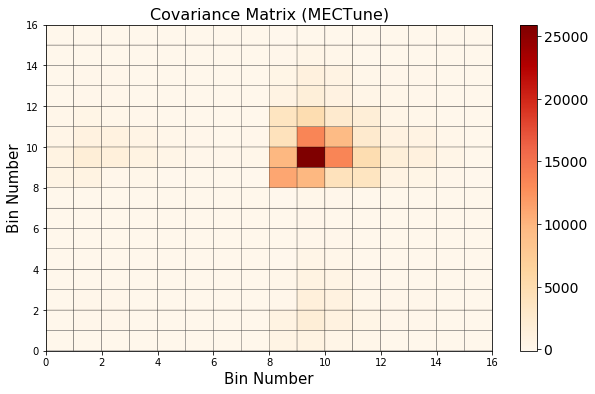

In [18]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_noTune_input_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("Bin Number", fontsize=15)
plt.ylabel("Bin Number", fontsize=15)

plt.title('Covariance Matrix (MECTune)', fontsize=16)


plt.savefig("data_covmat_MC_MECTune_input_leptonMom_comb_"+ending+".svg", bbox_inches='tight')

plt.show()

In [19]:
np.savetxt("data_covmat_MC_MECTune_input_leptonMom_comb_"+ending+".csv", 
           total_noTune_input_cov,
           delimiter =", ", 
           fmt ='% s')